In [15]:
# load existing model 
import torch

# for the HTTP Error 403
torch.hub._validate_not_a_forked_repo=lambda a,b,c: True

model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
print(model)


Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to C:\Users\fadzw/.cache\torch\hub\v0.9.0.zip


7.0%

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\fadzw/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
# load from sone repositories

import torch

model = torch.hub.load('lbleal1/torch-hub-test', 
                       'model', pretrained=True)
print(model)

C:\Users\fadzw\Downloads\.venv\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/lbleal1/torch-hub-test/zipball/main" to C:\Users\fadzw/.cache\torch\hub\main.zip
Downloading: "https://github.com/lbleal1/torch-hub-test/raw/main/model_resources/iris_classifier_params.pt" to C:\Users\fadzw/.cache\torch\hub\checkpoints\iris_classifier_params.pt


100.0%

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)


In [ ]:
# you can find more guide in here https://github.com/pytorch/vision

Using cache found in C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master
C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
YOLOv5  2025-6-21 Python-3.11.11 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 2 ties
Speed: 4.0ms pre-process, 86.9ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


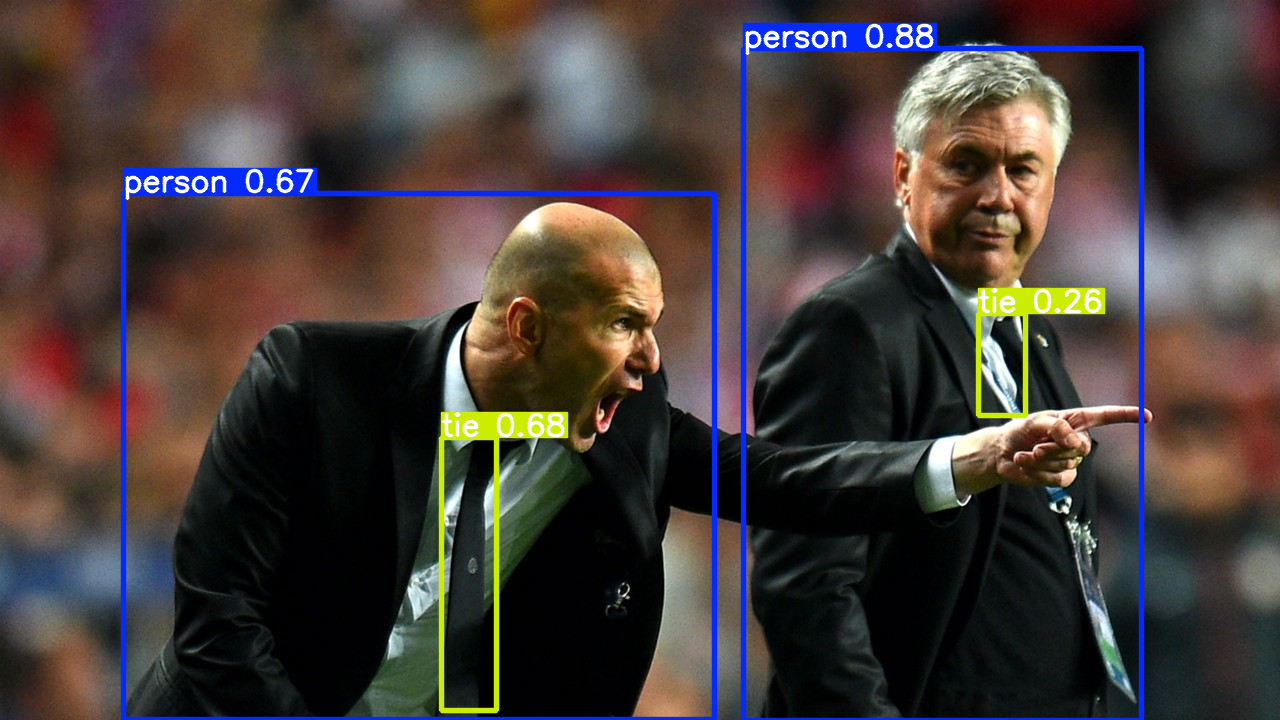

In [1]:
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

# --- CONFIG ---
# Use an example image from the web or your local path
image_path = "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg"

# Load image (from URL or local)
def load_image(img_path):
    if img_path.startswith("http"):
        import requests
        from PIL import Image
        from io import BytesIO

        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert("RGB")
        image = np.array(image)
        return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    else:
        return cv2.imread(img_path)

# Load image
image = load_image(image_path)
orig = image.copy()

# Load YOLOv5 model from Torch Hub
model = torch.hub.load("ultralytics/yolov5", "yolov5s", trust_repo=True)

# Convert BGR to RGB for inference
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(rgb_image)

# Print results
results.print()         # Text results
results.show()          # Pop-up window (may not work in Jupyter)
results.render()        # In-place render to .imgs

# Display in Jupyter
rendered_image = results.ims[0]  # numpy array with rendered results
plt.figure(figsize=(10, 8))
plt.imshow(rendered_image)
plt.axis('off')
plt.title("Detection Results")
plt.show()

# from here https://pyimagesearch.com/2021/12/20/torch-hub-series-1-introduction-to-torch-hub/


In [2]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

# Image
im = "https://ultralytics.com/images/zidane.jpg"

# Inference
results = model(im)

results.pandas().xyxy[0]
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

Using cache found in C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-21 Python-3.11.11 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


xmin        ymin         xmax        ymax  confidence  class  \
0  745.578613   48.470337  1142.694336  720.000000    0.868910      0   
1  124.744171  197.334503   844.397339  716.650513    0.630325      0   
2  441.238678  439.350647   498.380768  708.570984    0.616793     27   
3  594.081848  377.300385   635.423889  437.147797    0.274013     67   

         name  
0      person  
1      person  
2         tie  
3  cell phone

In [3]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

# Images
for f in "zidane.jpg", "bus.jpg":
    torch.hub.download_url_to_file("https://ultralytics.com/images/" + f, f)  # download 2 images
im1 = Image.open("zidane.jpg")  # PIL image
im2 = cv2.imread("bus.jpg")[..., ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model([im1, im2], size=640)  # batch of images

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie


# from here https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/#project-status

Using cache found in C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-21 Python-3.11.11 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
100%|███████████████████████████████| 49.2k/49.2k [00:00<00:00, 16.8MB/s]
100%|█████████████████████████████████| 134k/134k [00:00<00:00, 10.9MB/s]
C:\Users\fadzw/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/2: 720x1280 2 persons, 1 tie, 1 cell phone
image 2/2: 1080x810 4 persons, 1 bus
Speed: 2.0ms pre-process, 99.5ms inference, 0.0ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs\detect\exp


xmin        ymin         xmax        ymax  confidence  class  \
0  744.907715   47.730713  1142.076172  716.559692    0.867366      0   
1  127.860962  197.634521   845.973755  710.378174    0.637457      0   
2  441.277222  439.579590   498.367310  708.055664    0.635028     27   
3  594.006104  376.740417   635.634888  437.111267    0.277625     67   

         name  
0      person  
1      person  
2         tie  
3  cell phone